In [33]:
import sys, os
sys.path.append(os.pardir)
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
         
         
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
         
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
train loss:2.299777060685799
=== epoch:1, train acc:0.363, test acc:0.351 ===
train loss:2.2961129181657585
train loss:2.2875772965483416
train loss:2.2772668600609
train loss:2.2652208892557524
train loss:2.2388828748333425
train loss:2.2163686805977267
train loss:2.1631177337168026
train loss:2.1390987592574073
train loss:2.1282910867731566
train loss:2.045648345496055
train loss:2.0255809734272634
train loss:1.9457624849957187
train loss:1.8520768432250634
train loss:1.7855974152246912
train loss:1.7363285358566756
train loss:1.6152142791401576
train loss:1.5011397760525025
train loss:1.4312847903293402
train loss:1.4933393500812138
train loss:1.3842976547794814
train loss:1.2948732040910844
train loss:1.227445

train loss:0.5177567510810669
train loss:0.5625158204196401
train loss:0.5336637201571847
train loss:0.7182675504605112
train loss:0.5683646726368798
train loss:0.4102421701271625
train loss:0.6123527435402542
train loss:0.4604141460122224
train loss:0.5635116218141647
train loss:0.5224618409901044
train loss:0.4692708889916808
train loss:0.7009281629311619
train loss:0.4323314905469563
train loss:0.5810940099363247
train loss:0.45892917970264124
train loss:0.48075049268038633
train loss:0.5357238335901395
train loss:0.5754192223921653
train loss:0.41854775402534455
train loss:0.5127467527453807
train loss:0.671361243112595
train loss:0.4621525078601596
train loss:0.5974871248791829
train loss:0.6053477672204809
train loss:0.6352668351056896
train loss:0.5251836240775996
train loss:0.574505126500913
train loss:0.49925823239093814
train loss:0.6374468848038214
train loss:0.5679720320760934
train loss:0.5573902010930969
train loss:0.5324138222680478
train loss:0.6419997234633954
train lo

train loss:0.3664650038106021
train loss:0.311077055719451
train loss:0.3896287997761539
train loss:0.4496724490707129
train loss:0.4191704285936553
train loss:0.5605802832754534
train loss:0.5415784797214627
train loss:0.4118318569603337
train loss:0.5227371455242035
train loss:0.4065244311753258
train loss:0.3157192979303285
train loss:0.34719007308370003
train loss:0.26073205518973047
train loss:0.3179136003997159
train loss:0.3345430578124444
train loss:0.5244079310947358
train loss:0.4424209284904844
train loss:0.4100572878390289
train loss:0.43793923081237357
train loss:0.29464301662919196
train loss:0.3393857835731415
train loss:0.5510915905344684
train loss:0.6264205052913376
train loss:0.5349415080012793
train loss:0.3648927588343978
train loss:0.45450628743027865
train loss:0.4331386175238087
train loss:0.3928623681397089
train loss:0.3868978783884413
train loss:0.4329099091086502
train loss:0.4886125143225026
train loss:0.4169132897897462
train loss:0.4086023447853934
train 

train loss:0.3004703584316305
train loss:0.3122729495849948
train loss:0.44199052074301415
train loss:0.31224180995845857
train loss:0.45288748714625676
train loss:0.2906747699751445
train loss:0.41447381959006224
train loss:0.3592392189043799
train loss:0.4676961367987845
train loss:0.4822724932027812
train loss:0.44541710190729716
train loss:0.4230330275129568
train loss:0.4654703039386877
train loss:0.43581214705985366
train loss:0.5148197100896259
train loss:0.34425102789952855
train loss:0.2858330886828261
train loss:0.22621951083827285
train loss:0.4355302901619875
train loss:0.45900534067129395
train loss:0.3151422425514677
train loss:0.3515536543240411
train loss:0.2128945045455119
train loss:0.3378806400853351
train loss:0.31067819755179144
train loss:0.4837092716263243
train loss:0.5388362978264855
train loss:0.3719902480532499
train loss:0.2708640394900646
train loss:0.30380191961176023
train loss:0.3290741711062969
train loss:0.38043499531267705
train loss:0.506437910670317

train loss:0.3198995631000343
train loss:0.28815972213870056
train loss:0.2351008052118308
train loss:0.27039945959685197
train loss:0.44765103043824
train loss:0.3068197505027339
train loss:0.3170533665277701
train loss:0.37658011311943795
train loss:0.38280305072195936
train loss:0.3103350708200181
train loss:0.29694139006639597
train loss:0.26977756606264114
train loss:0.326647831085963
train loss:0.35208839797566815
train loss:0.28331669749447314
train loss:0.3495310812177721
train loss:0.3190550996243898
train loss:0.39953475992802956
train loss:0.3433044718037188
train loss:0.4367039748147264
train loss:0.29106044694718525
train loss:0.3693735783000986
train loss:0.3474006694407145
train loss:0.426494067379734
train loss:0.2906838223828501
train loss:0.4736605392656763
train loss:0.3915042763595259
train loss:0.3531941270632236
train loss:0.3787157272815707
train loss:0.28822336754889455
train loss:0.2763599740924035
train loss:0.32305304952051905
train loss:0.2794208764399924
tr

train loss:0.34259385979934676
train loss:0.3873905031417572
train loss:0.3170107285967325
train loss:0.3361037726166181
train loss:0.21776769347738395
train loss:0.445365399350611
train loss:0.22096796964583432
train loss:0.2898776958809764
train loss:0.30112201484451484
train loss:0.3085555151653893
train loss:0.3225160099358159
train loss:0.3619557623271597
train loss:0.2361322049188317
train loss:0.5116538305900127
train loss:0.23762751610929023
train loss:0.2992845080443151
train loss:0.4075512389405172
train loss:0.4828475891475135
train loss:0.3052018055208961
train loss:0.3774607617015111
train loss:0.26470351314985213
train loss:0.4194468143602297
train loss:0.358661693629167
train loss:0.35472148010985727
train loss:0.3472492879076415
train loss:0.32200159222041813
train loss:0.32178999876998854
train loss:0.29010405942733963
train loss:0.2797930556484411
train loss:0.3221031449034647
train loss:0.3546537564058593
train loss:0.34273053403776543
train loss:0.316815013869737
tr

train loss:0.2873472913580447
train loss:0.2778953342716805
train loss:0.23732400341539542
train loss:0.3320221414649997
train loss:0.3170074242244081
train loss:0.28512281070326895
train loss:0.19737475563866536
train loss:0.31067413499368657
train loss:0.235994860521568
train loss:0.3289867218377191
train loss:0.3337552191521482
train loss:0.28615651994918606
train loss:0.34739861300418157
train loss:0.15145266391848147
train loss:0.20659103555720978
train loss:0.2545643449276179
train loss:0.29471696429508404
train loss:0.2338260883381472
train loss:0.3039308179714506
train loss:0.2057119574602887
train loss:0.39910614810557976
train loss:0.2920118738131468
train loss:0.37991803055185974
train loss:0.24709425966141865
train loss:0.48002566495413695
train loss:0.2200884983180866
train loss:0.28806254441976153
train loss:0.21860780280643557
train loss:0.2812045855834313
train loss:0.418038752414295
train loss:0.3439148367434716
train loss:0.3697904909900632
train loss:0.28472590839279

train loss:0.2041960063959415
train loss:0.19467052584982472
train loss:0.33017451982244816
train loss:0.3028572264347896
train loss:0.36727773555789545
train loss:0.33343065614974654
train loss:0.3087267182468232
train loss:0.2662323128038967
train loss:0.35593329134052765
train loss:0.5262352532463838
train loss:0.29536243771659554
train loss:0.3216786142120505
train loss:0.3061007269315547
train loss:0.23474875644825566
train loss:0.2614731374907043
train loss:0.32586820017128615
train loss:0.26806437621443646
train loss:0.34287728151785385
train loss:0.2126206023649424
train loss:0.2231277752029187
train loss:0.4271664236783036
train loss:0.21470659760343958
train loss:0.259357540950201
train loss:0.2706457003011003
train loss:0.3241552544389517
train loss:0.22700360550348972
train loss:0.3166518306391623
train loss:0.28177662282395227
train loss:0.3243431460624655
train loss:0.2040132044086393
train loss:0.38916400113304883
train loss:0.23550858779840148
train loss:0.3554213415293

train loss:0.21176324851117875
train loss:0.3005131292373795
train loss:0.28263619186957206
train loss:0.254207785205373
train loss:0.30057856031199526
train loss:0.27375523323944095
train loss:0.2557779406037941
train loss:0.2729785805830421
train loss:0.17823427017280438
train loss:0.35375260733213487
train loss:0.3037367003318925
train loss:0.23811200781149128
train loss:0.4695148425368628
train loss:0.19792430172717626
train loss:0.21648406781930818
train loss:0.28805138151876136
train loss:0.32442328462540937
train loss:0.2873779771664637
train loss:0.29495788183862376
train loss:0.3153084396144425
train loss:0.27481072445584176
train loss:0.40811241973663215
train loss:0.2926248274825199
train loss:0.17554832775271412
train loss:0.3278056643138632
train loss:0.3054838867933942
train loss:0.2335329141532404
train loss:0.28089724966787516
train loss:0.3420078254977627
train loss:0.17865027558254665
train loss:0.3681309343599657
train loss:0.2680295049059154
train loss:0.25459802778

train loss:0.33778060450918984
train loss:0.30034331054725205
train loss:0.3369718742073426
train loss:0.2563120616252718
train loss:0.21256562749699942
train loss:0.2053577064875228
train loss:0.41997745965784106
train loss:0.27484677746051717
train loss:0.22493093693289748
train loss:0.25410263727180976
train loss:0.4590293711918716
train loss:0.3002599038428237
train loss:0.24831534894118618
train loss:0.29491155945381636
train loss:0.2103273362835571
train loss:0.28726813251393074
train loss:0.37178253688156915
train loss:0.1984366133689963
train loss:0.3807616586171821
train loss:0.2435592009104951
train loss:0.3275949425773937
train loss:0.19692181306746231
train loss:0.3035194372115835
train loss:0.29421041019772654
train loss:0.3006266034323607
train loss:0.24609502559843688
train loss:0.2679342278001097
train loss:0.2196167953499918
train loss:0.18118358551135155
train loss:0.27295834668280944
train loss:0.3321170764295778
train loss:0.2602250198576872
train loss:0.25403728442

train loss:0.2429263454690431
train loss:0.26325892416339386
train loss:0.13587576489034883
train loss:0.4037845901756333
train loss:0.30106371111878344
train loss:0.28219950978388897
train loss:0.20570370551038844
train loss:0.33133736355255883
train loss:0.24385642778265043
train loss:0.23659267528419942
train loss:0.260480833038931
train loss:0.3639663596850764
train loss:0.13472614019120238
train loss:0.2679144900612301
train loss:0.23276712868315821
train loss:0.2513474501437183
train loss:0.24323489060426862
train loss:0.30647653265661257
train loss:0.1968976204361547
train loss:0.2316745909558112
train loss:0.3449544110198257
train loss:0.27818425458960083
train loss:0.26190331534558176
train loss:0.22598247997384266
train loss:0.2481715393440927
train loss:0.4444737502940337
train loss:0.18412475966726288
train loss:0.271738567702315
train loss:0.18536882789144626
train loss:0.3148258580603631
train loss:0.16995125715062642
train loss:0.2477641472308055
train loss:0.32104660737

train loss:0.19177221959328858
train loss:0.3391016481487755
train loss:0.28416708178505967
train loss:0.24462886744501308
train loss:0.2665158237735168
train loss:0.23671911175401014
train loss:0.23591880337793278
train loss:0.23249744399045205
train loss:0.27281920154587574
train loss:0.17060650403685712
train loss:0.3616639338062421
train loss:0.104139634153981
train loss:0.25636900268714324
train loss:0.2901547619150106
train loss:0.2690900826342691
train loss:0.26757940824268794
train loss:0.28892704104576294
train loss:0.3468065810808197
train loss:0.2517054813013538
train loss:0.3114377681263427
train loss:0.28615544802894094
train loss:0.22398383149854628
train loss:0.1723908502766092
train loss:0.26403509626821675
train loss:0.14186347319215747
train loss:0.3369389211410811
train loss:0.2219487079051291
train loss:0.20703751214087307
train loss:0.2704911302632731
train loss:0.25307957876945947
train loss:0.3590358459949865
train loss:0.2465152698984448
train loss:0.27669178434

train loss:0.16734489467164793
train loss:0.26356504468948866
train loss:0.2985611710049651
train loss:0.28008740982174507
train loss:0.20065186267821922
train loss:0.2599554431114428
train loss:0.17207220980836915
train loss:0.21932423780856422
train loss:0.26626510914197365
train loss:0.2578405804634021
train loss:0.21453697224748464
train loss:0.33971358857877026
train loss:0.2571764547749242
train loss:0.18491137072444283
train loss:0.3417406034486642
train loss:0.21172160645035404
train loss:0.2146615838010861
train loss:0.21930280427237311
train loss:0.3008192767626626
train loss:0.31966201138252875
train loss:0.15290027207871634
train loss:0.267884959477533
train loss:0.221038879700528
train loss:0.3692221975346284
train loss:0.18247729641187024
train loss:0.3274163149764939
train loss:0.19136689127990983
train loss:0.16075350555141796
train loss:0.3277362478180569
train loss:0.11996776726123953
train loss:0.2407352278600265
train loss:0.3168298901857506
train loss:0.15902860544

train loss:0.2277006485541369
train loss:0.20765717549718282
train loss:0.24514950684610398
train loss:0.224464739008522
train loss:0.19634967406107187
train loss:0.22109853683825698
train loss:0.192269984101115
train loss:0.2096294370413321
train loss:0.19703117708592494
train loss:0.3095220398355333
train loss:0.18301370312094647
train loss:0.15003377206083407
train loss:0.20212581364897517
train loss:0.13101467710607187
train loss:0.3136334206288127
train loss:0.2386519884764245
train loss:0.31441174407843797
train loss:0.3270222452723948
train loss:0.20023496764916116
train loss:0.21428322049592835
train loss:0.15588905325066685
train loss:0.16538441491831052
train loss:0.13246751127562084
train loss:0.3433342257077413
train loss:0.2624598100613593
train loss:0.1478095912788892
train loss:0.2353483496355964
train loss:0.18159265666709104
train loss:0.17097165055888333
train loss:0.2312791540182604
train loss:0.18017827056694027
train loss:0.22816903855967507
train loss:0.1854062410

train loss:0.15405719245687036
train loss:0.2727233655816009
train loss:0.28674178368264785
train loss:0.20711066065243572
train loss:0.13861414369265573
train loss:0.2227530169670262
train loss:0.1743492674155258
train loss:0.2714737872874427
train loss:0.21566516114379508
train loss:0.20294107883463713
train loss:0.2646652659311618
train loss:0.20197932637601787
train loss:0.13034201581633365
train loss:0.3421232987580376
train loss:0.14330351661361
train loss:0.26591791618431393
train loss:0.16577360061976382
train loss:0.2718580138334101
train loss:0.15584018871132677
train loss:0.18520523582307125
train loss:0.2063177350231701
train loss:0.18780758315274415
train loss:0.1900635110541816
train loss:0.3058604479531192
train loss:0.19483805504382093
train loss:0.12078049833768807
train loss:0.16704922683864432
train loss:0.14672274943740737
train loss:0.14215225496575637
train loss:0.32944380742124
train loss:0.20393136008201423
train loss:0.2458978952735655
train loss:0.177823332897

train loss:0.22445777199561712
train loss:0.12553508119231133
train loss:0.20768664892498495
train loss:0.13429803660540462
train loss:0.10775659687442321
train loss:0.16197499507208796
train loss:0.20748503035751623
train loss:0.2048856536412041
train loss:0.17758777819585134
train loss:0.27306969442545026
train loss:0.13339855150830415
train loss:0.2281729741484642
train loss:0.15227012756332944
train loss:0.17527506011636845
train loss:0.1871604111878196
train loss:0.21180386078726518
train loss:0.17012416153185939
train loss:0.17105665398015457
train loss:0.13774184391918673
train loss:0.2947440413413039
train loss:0.21215589620037595
train loss:0.19095446152924014
train loss:0.21447666370451002
train loss:0.16518076449818453
train loss:0.21191839230481224
train loss:0.1600045188856163
train loss:0.20846123494563035
train loss:0.24755924876020186
train loss:0.26571091910941297
train loss:0.20658758572381763
train loss:0.14366984038723168
train loss:0.12016100177312389
train loss:0.

train loss:0.2146041259877757
train loss:0.2572827626278075
train loss:0.3006844498470033
train loss:0.20523615844958848
train loss:0.3046966526582651
train loss:0.19758252378474384
train loss:0.230649719319734
train loss:0.17701377682137728
train loss:0.1949479281018852
train loss:0.1492844454799594
train loss:0.17154860016466209
train loss:0.3835801791704182
train loss:0.18310632162440965
train loss:0.13884837155630614
train loss:0.19347626074015828
train loss:0.27145633796507057
train loss:0.2497235562381396
train loss:0.25900881588816427
train loss:0.18627659378694086
train loss:0.25973746498626565
train loss:0.11991175309185988
train loss:0.13457271499388485
train loss:0.15992075654292065
train loss:0.18151864315956526
train loss:0.1936554601079694
train loss:0.15014437205498488
train loss:0.24118171410783518
train loss:0.4191684928675221
train loss:0.2407254421959636
train loss:0.17256374894007276
train loss:0.21898265588473342
train loss:0.19082635680957097
train loss:0.24796074

train loss:0.17326199855913246
train loss:0.14834601617589296
train loss:0.29032688698355047
train loss:0.1791811686528913
train loss:0.1858700274494501
train loss:0.30726667524779905
train loss:0.22705493413175282
train loss:0.23203556719416693
train loss:0.13891008356206175
train loss:0.19735194745438975
train loss:0.1220657794699271
train loss:0.2341966461432379
train loss:0.14443829278479728
train loss:0.20179276643389854
train loss:0.23738269933503864
train loss:0.11447744472927314
train loss:0.16351014042506926
train loss:0.17128654680429858
train loss:0.18672216390692925
train loss:0.1555613725655676
train loss:0.19434610659608922
train loss:0.22522835490436408
train loss:0.05948249825880505
train loss:0.2637186303838775
train loss:0.2337859463939492
train loss:0.17880170490497108
train loss:0.22465820847000217
train loss:0.11943226016179682
train loss:0.10231466885291693
train loss:0.1427493866452748
train loss:0.23667770109171918
train loss:0.1366190606474267
train loss:0.1742

train loss:0.2676122916808959
train loss:0.2638803653214402
train loss:0.19002912344859726
train loss:0.12656514282826872
train loss:0.09338797463530199
train loss:0.23498777813854604
train loss:0.13542715219159057
train loss:0.17427137332701953
train loss:0.173794749963445
train loss:0.19463605947909757
train loss:0.18248004513127708
train loss:0.21815662093502108
train loss:0.28632011358666865
train loss:0.13393479678590603
train loss:0.1262194042662985
train loss:0.17787757796971504
train loss:0.1835468888113929
train loss:0.24361218752438718
train loss:0.1915384515474635
train loss:0.14816359940625104
train loss:0.1462534721955985
train loss:0.12639529559681859
train loss:0.27481022998684307
train loss:0.18580532766892438
train loss:0.23911829042534813
train loss:0.15862542569854537
train loss:0.20765809364573912
train loss:0.20397938437962168
train loss:0.2215315725329767
train loss:0.1419272057140051
train loss:0.09854316616307822
train loss:0.2515905573847996
train loss:0.233195

train loss:0.21589469596127095
train loss:0.1478130747643645
train loss:0.2006660284000215
train loss:0.18900600190753788
train loss:0.12155585671963574
train loss:0.1890409085826672
train loss:0.14955806567223767
train loss:0.1999135809053952
train loss:0.20823795872671663
train loss:0.1992599208388654
train loss:0.2152440006066243
train loss:0.2303720675934679
train loss:0.14578666667227796
train loss:0.20199278233679097
train loss:0.30507289101399915
train loss:0.13653491056967956
train loss:0.11720476436456778
train loss:0.11132622058763757
train loss:0.30291358089237613
train loss:0.19618233457558895
train loss:0.19601026917405937
train loss:0.12047439521663902
train loss:0.24698156651672842
train loss:0.22797270748761267
train loss:0.28337689494795826
train loss:0.1811487928380565
train loss:0.1768482448856327
train loss:0.17008147375213517
train loss:0.2867093687832976
train loss:0.25196608255619063
train loss:0.20293494703620601
train loss:0.13794300347044514
train loss:0.23461

train loss:0.14563821812892078
train loss:0.055469024389396535
train loss:0.1498583274947172
train loss:0.14495046079423277
train loss:0.2563467469420596
train loss:0.21889791828043983
train loss:0.2733027248960336
train loss:0.33971108617723317
train loss:0.22796440823373357
train loss:0.19313951011976202
train loss:0.14739553449728546
train loss:0.24527931931915328
train loss:0.12867797627209618
train loss:0.11888879768102953
train loss:0.27652628989330696
train loss:0.23261204734057894
train loss:0.2137594619443952
train loss:0.11453217290104722
train loss:0.15798203411629363
train loss:0.0988059402754453
train loss:0.18005985671977137
train loss:0.2386935054484244
train loss:0.1810031078346099
train loss:0.19983434528999666
train loss:0.15303263564870886
train loss:0.24057517925187274
train loss:0.10722943870752644
train loss:0.2525491697162128
train loss:0.2493390893732058
train loss:0.2529464055892968
train loss:0.15404419047467122
train loss:0.2393755054540383
train loss:0.30123

train loss:0.23576432391951235
train loss:0.16745686947142294
train loss:0.28915184063923843
train loss:0.1070166785989502
train loss:0.19534705129759847
train loss:0.20055032079882654
train loss:0.10797394380459957
train loss:0.25767069402611636
train loss:0.16931381341584928
train loss:0.1123088681984844
train loss:0.19257643634584645
train loss:0.2581753076987263
train loss:0.13406467240463257
train loss:0.20332062448214316
train loss:0.11325575850744599
train loss:0.15602176575631804
train loss:0.1135865538179442
train loss:0.13175122634057623
train loss:0.2416935756720461
train loss:0.18341032233423127
train loss:0.20599601203883444
train loss:0.14396199005065097
train loss:0.12688677364606737
train loss:0.23342886196224152
train loss:0.1951572495201099
train loss:0.16703201867822642
train loss:0.22172672865886725
train loss:0.22881988417959362
train loss:0.14785085173058685
train loss:0.12874158023768084
train loss:0.14315312703093494
train loss:0.22184130364792665
train loss:0.1

train loss:0.0844992137494307
train loss:0.14196743854976085
train loss:0.33558502745194796
train loss:0.21806221219198946
train loss:0.20585339633932165
train loss:0.23779205396193492
train loss:0.13098977883245352
train loss:0.11960052290096806
train loss:0.14872546386303218
train loss:0.20100474555167835
train loss:0.0960182092104711
train loss:0.19268418794142148
train loss:0.13871810754859903
train loss:0.07954366593439803
train loss:0.17954831269994334
train loss:0.22850738214487404
train loss:0.21371267923896833
train loss:0.15941827393660124
train loss:0.15984568701785412
train loss:0.16177057880160903
train loss:0.1537682938558248
train loss:0.11888559067763108
train loss:0.1347094532804016
train loss:0.23188277043097863
train loss:0.1923100395127836
train loss:0.10866696701969827
train loss:0.1255169209199345
train loss:0.19020482884168716
train loss:0.14292092124838945
train loss:0.14165412144957643
train loss:0.14334855748794528
train loss:0.2185427867774755
train loss:0.17

train loss:0.22552754863811375
train loss:0.2425444322415333
train loss:0.11056738784424251
train loss:0.1487439608271074
train loss:0.11341138511236641
train loss:0.1838537152573806
train loss:0.09771086283033066
train loss:0.261559921559183
train loss:0.22541252070868026
train loss:0.14924638791375458
train loss:0.09463596923798563
train loss:0.13155194134765247
train loss:0.13453966942350973
train loss:0.23099328196496408
train loss:0.1230842046285939
train loss:0.20275300522085307
train loss:0.11527230590659443
train loss:0.14390532772502618
train loss:0.09337884718254404
train loss:0.1171831814591491
train loss:0.15484692885700002
train loss:0.1533584088079757
train loss:0.1835851244178616
train loss:0.21226478079111366
train loss:0.25279294444001754
train loss:0.15887787766992464
train loss:0.13944137068734494
train loss:0.17638461107918943
train loss:0.18314999537727997
train loss:0.08306773073876504
train loss:0.13903451015730112
train loss:0.1279671243150954
train loss:0.14486

train loss:0.13589544873021867
train loss:0.1116110163581449
train loss:0.158311672376503
train loss:0.14532790510475485
train loss:0.09912417090592492
train loss:0.16079667997989486
train loss:0.12510534782861651
train loss:0.12729315016442633
train loss:0.13307086127890536
train loss:0.15341370593588627
train loss:0.15213324639165
train loss:0.1782252680780388
train loss:0.0490779447165979
train loss:0.12056152108795203
train loss:0.18972242830511635
train loss:0.14076669213173118
train loss:0.16791409777545277
train loss:0.125747693993365
train loss:0.1634535093979375
train loss:0.26656399814863213
train loss:0.10466947860155601
train loss:0.08895617370767905
train loss:0.15878627065804019
train loss:0.18719837181691737
train loss:0.07890603178774001
train loss:0.14013599755947095
train loss:0.20570657671017625
train loss:0.17126822823935575
train loss:0.27142922061994174
train loss:0.15409488043172703
train loss:0.20479357294779535
train loss:0.160085930969502
train loss:0.24279175

train loss:0.20745759183775248
train loss:0.08009709960355937
train loss:0.22246745244355892
train loss:0.19730275749722945
train loss:0.100426637887895
train loss:0.08896371630847826
train loss:0.16264322501470205
train loss:0.09954983235640738
train loss:0.06056129763209126
train loss:0.10743748904506514
train loss:0.2186887177637264
train loss:0.1624933890141205
train loss:0.22167915895285456
train loss:0.20206567031649902
train loss:0.10074540402801473
train loss:0.11923864849251102
train loss:0.13047188125260578
train loss:0.203667130126734
train loss:0.13495611146049744
train loss:0.13366057637723874
train loss:0.17146194982750323
train loss:0.13952431402756704
train loss:0.12587548419688088
train loss:0.19114358780615362
train loss:0.043576192390285075
train loss:0.1348139602796058
train loss:0.26875947874047373
train loss:0.06210080524276221
train loss:0.173385458356246
train loss:0.12908775327798108
train loss:0.1060885995175738
train loss:0.22897295571810455
train loss:0.1392

train loss:0.10214295121553922
train loss:0.24123398509171445
train loss:0.20652590510125243
train loss:0.15941237456233617
train loss:0.1560292858844253
train loss:0.13110844799750918
train loss:0.1648210762135911
train loss:0.1090781476749659
train loss:0.1524015402772203
train loss:0.19896027656684243
train loss:0.1184885478351416
train loss:0.237936481419512
train loss:0.11941443578391768
train loss:0.08481046155655697
train loss:0.03806167005789575
train loss:0.22486084166242293
train loss:0.22031195930137681
train loss:0.064384332826265
train loss:0.19734557472083175
train loss:0.17792081492286105
train loss:0.04231741242644991
train loss:0.25045554235517875
train loss:0.1944598135487762
train loss:0.15433691339815458
train loss:0.18560937354631046
train loss:0.09067864222065472
train loss:0.08069887840843007
train loss:0.15079221915032406
train loss:0.08841726303936033
train loss:0.12392982872496834
train loss:0.1507243845390013
train loss:0.13738011937006767
train loss:0.121349

train loss:0.17171708964537089
train loss:0.14222743008102956
train loss:0.12023684801722503
train loss:0.1672970413879117
train loss:0.17173138961686024
train loss:0.1744927167794355
train loss:0.2121819485394345
train loss:0.18114637344235013
train loss:0.11997779759685594
train loss:0.15608993681957223
train loss:0.14743035375351354
train loss:0.04711778662578691
train loss:0.10792968293439137
train loss:0.10956649068079301
train loss:0.1651125173875082
train loss:0.1341908107446118
train loss:0.18800433137870448
train loss:0.08969124697048078
train loss:0.15562729794348903
train loss:0.15401209746508637
train loss:0.11679143594950413
train loss:0.13082011910202151
train loss:0.11210435730545608
train loss:0.10753973069037867
train loss:0.1072545810598438
train loss:0.14911894804331888
train loss:0.12935814863362496
train loss:0.1500938876471192
train loss:0.07269967357613188
train loss:0.1119063427051294
train loss:0.09078567104524858
train loss:0.15133091198046386
train loss:0.067

train loss:0.07234564079749259
train loss:0.07965702611836403
train loss:0.21185327350230096
train loss:0.13433988325318397
train loss:0.08548576593345164
train loss:0.07514345116896068
train loss:0.10600372257982438
train loss:0.1405275356666578
train loss:0.12890964907004018
train loss:0.09176527947747502
train loss:0.16858292245443476
train loss:0.1207159168768753
train loss:0.08846218004905675
train loss:0.05416013389350085
train loss:0.09652354373237293
train loss:0.14211478264217714
train loss:0.14719816760743415
train loss:0.05861711972637187
train loss:0.0930773481463156
train loss:0.06848008667109753
train loss:0.08807570119356735
train loss:0.10797422547940284
train loss:0.17300166754061624
train loss:0.13445547507482952
train loss:0.19355636959663103
train loss:0.17491913324086145
train loss:0.10945761504720214
train loss:0.11922169828904947
train loss:0.12172033132099346
train loss:0.19781131889881676
train loss:0.143078332875307
train loss:0.10327021802038275
train loss:0.

train loss:0.11553435000459875
train loss:0.08658460849286165
train loss:0.08453409814171088
train loss:0.1645886030819167
train loss:0.11018963967180934
train loss:0.08758057483891787
train loss:0.18524441879878087
train loss:0.10614707466470964
train loss:0.18947577623894366
train loss:0.15047279415927586
train loss:0.09756748288158827
train loss:0.06864720093680138
train loss:0.12150681551116758
train loss:0.09634673826022172
train loss:0.08405080209492556
train loss:0.08900683144395236
train loss:0.15597287900463314
train loss:0.08736820215400064
train loss:0.1501925080029218
train loss:0.07167331218569775
train loss:0.19353940101256412
train loss:0.08340550929820865
train loss:0.12014092350263116
train loss:0.11464340089793192
train loss:0.04390137138239053
train loss:0.063054583092524
train loss:0.06326371491614383
train loss:0.09265385334078252
train loss:0.04298223706589882
train loss:0.23311162053900358
train loss:0.1112853357589323
train loss:0.11505269703129387
train loss:0.

train loss:0.06850239163593641
train loss:0.10086835101779759
train loss:0.08935105574346254
train loss:0.15578258378402182
train loss:0.09491531574089081
train loss:0.13561063123268968
train loss:0.09794998280655459
train loss:0.09093045749400294
train loss:0.10642143292748824
train loss:0.13347509688638082
train loss:0.11129711568297569
train loss:0.0772640627381772
train loss:0.07663717625130523
train loss:0.11617532903940765
train loss:0.10321489630854248
train loss:0.06830084944457658
train loss:0.034782137893030945
train loss:0.06603357910555062
train loss:0.14711612073741495
train loss:0.18305088980311662
train loss:0.10913345456564602
train loss:0.08995501635805458
train loss:0.15032377078565717
train loss:0.05358518616212621
train loss:0.06110399807754656
train loss:0.1170674179107179
train loss:0.16183953212375649
train loss:0.09380417834464437
train loss:0.1858881106950523
train loss:0.13356891908719226
train loss:0.042798441025179546
train loss:0.13509145336104797
train los

train loss:0.17832980985929506
train loss:0.1419351646547625
train loss:0.0871467933382541
train loss:0.10465268733689216
train loss:0.13754293390379993
train loss:0.10160290639117533
train loss:0.0629704123762139
train loss:0.06825126101627205
train loss:0.08909396921184082
train loss:0.1352921007801952
train loss:0.07786389415357042
train loss:0.06760948613910132
train loss:0.11826494471155201
train loss:0.08503912725992971
train loss:0.12958761637884364
train loss:0.07728663207054845
train loss:0.06723913678312131
train loss:0.1539740609463722
train loss:0.06481887071382951
train loss:0.16353452639770327
train loss:0.17425107512384616
train loss:0.09311199029892835
train loss:0.15546264187548625
train loss:0.10599056773413108
train loss:0.16136303003664448
train loss:0.03730726768316194
train loss:0.10150699284490715
train loss:0.11933496352250636
train loss:0.07397492242178474
train loss:0.14600463000060707
train loss:0.09339050026271359
train loss:0.10231421204054826
train loss:0.

train loss:0.06970593033917777
train loss:0.04898282838629708
train loss:0.0737002272458105
train loss:0.16334129840186334
train loss:0.19309496326258388
train loss:0.08135323272403058
train loss:0.14680116222519268
train loss:0.10444933517528808
train loss:0.15616616717793572
train loss:0.07527469930980775
train loss:0.05390805048250863
train loss:0.05797902416272963
train loss:0.1858513184712058
train loss:0.09295397852861367
train loss:0.057142663401120564
train loss:0.18619918690633827
train loss:0.1222759878321227
train loss:0.03698774533709387
train loss:0.06412831332644894
train loss:0.13671828223978516
train loss:0.1725031208787513
train loss:0.07128619964916584
train loss:0.038329199163225545
train loss:0.14668343293735214
train loss:0.11721194874407771
train loss:0.20974663257613746
train loss:0.17429951922251052
train loss:0.08744954739221576
train loss:0.20089851357347072
train loss:0.08570281052743796
train loss:0.10636359181805131
train loss:0.056153724646255794
train los

train loss:0.14307102061933416
train loss:0.10468889373666453
train loss:0.07790707451818422
train loss:0.11115388533861964
train loss:0.048093503516415906
train loss:0.055183794725477915
train loss:0.11653120333582061
train loss:0.17788831766592617
train loss:0.10731046783945603
train loss:0.19899979835312379
train loss:0.08896630092657676
train loss:0.05055209091957349
train loss:0.09279304561624785
train loss:0.11722987443647598
train loss:0.12151615488173496
train loss:0.07298457036060682
train loss:0.10688409064251803
train loss:0.05949148052686102
train loss:0.072119144301086
train loss:0.061419844112894674
train loss:0.12033370394986243
train loss:0.09966845444578688
train loss:0.08361015485828753
train loss:0.09107956830467505
train loss:0.1087011127029837
train loss:0.18423213894818957
train loss:0.11167718949559341
train loss:0.21303452345843174
train loss:0.10093880068649635
train loss:0.11657057716730378
train loss:0.10270168914985037
train loss:0.07045721872076278
train lo

train loss:0.1282706123749997
train loss:0.20746858365048468
train loss:0.09076694110261777
train loss:0.11159516785838218
train loss:0.06734843584248995
train loss:0.0932625671718891
train loss:0.08868193882538328
train loss:0.048396429853915214
train loss:0.06121754695102115
train loss:0.0661930615783356
train loss:0.08574499263416457
train loss:0.09924628213093557
train loss:0.14881985492054656
train loss:0.11100411794522104
train loss:0.0916252748008338
train loss:0.06866855833211774
train loss:0.05264741444028294
train loss:0.12909238288493508
train loss:0.05264588266353904
train loss:0.10612901666105466
train loss:0.06630081161631884
train loss:0.08304918565231384
train loss:0.08645614453406025
train loss:0.11715613748518759
train loss:0.041219423481108394
train loss:0.06832178506763983
train loss:0.06818432962979387
train loss:0.11469602142652752
train loss:0.0531341076005467
train loss:0.0663601229612041
train loss:0.12052815727847464
train loss:0.18776551226207153
train loss:0

train loss:0.06529321552513656
train loss:0.07156972758874437
train loss:0.15508986964085358
train loss:0.07747994901750482
train loss:0.08684338701261671
train loss:0.12556012370076391
train loss:0.0997322862466462
train loss:0.09689617839257755
train loss:0.09010033671116177
train loss:0.05324874225309748
train loss:0.12335709576789683
train loss:0.07111950272625953
train loss:0.04824614020434485
train loss:0.06271355840176172
train loss:0.06532387400257252
train loss:0.1475128590860324
train loss:0.07908599359692348
train loss:0.08636125636308307
train loss:0.0941666529787044
train loss:0.0854689146556729
train loss:0.10275815922227824
train loss:0.08240790937765881
train loss:0.1196725329236335
train loss:0.10630128830526987
train loss:0.087368477982186
train loss:0.06856694394407803
train loss:0.10754590591744918
train loss:0.08817768531787404
train loss:0.07028022843399769
train loss:0.07413214347170977
train loss:0.11552193148874836
train loss:0.05055124881178935
train loss:0.06

train loss:0.11233709294996058
train loss:0.10170833080710215
train loss:0.060695091409249946
train loss:0.07542300905335952
train loss:0.11662666880954968
train loss:0.1445513326314188
train loss:0.07171905427515123
train loss:0.10307311446740418
train loss:0.09264616834968727
train loss:0.16603309288668425
train loss:0.06549529000491125
train loss:0.13792011952060731
train loss:0.0707125873628144
train loss:0.10851906331723697
train loss:0.1330617020623018
train loss:0.0948993413116928
train loss:0.04803691206926215
train loss:0.10471767974556326
train loss:0.20360841813100974
train loss:0.04256850462750652
train loss:0.10412852549439011
train loss:0.09647184385027063
train loss:0.15168343719390395
train loss:0.09293926466486684
train loss:0.09289923511957604
train loss:0.038102292532428944
train loss:0.06923366859866471
train loss:0.1247325720229868
train loss:0.064391591565815
train loss:0.07032178633687651
train loss:0.057135588168233574
train loss:0.0987690957273686
train loss:0.

train loss:0.0752188068253523
train loss:0.10627936234602448
train loss:0.0750425494796308
train loss:0.06438019319983872
train loss:0.03475492118123053
train loss:0.13607252269958567
train loss:0.032042717615574666
train loss:0.03203834200034719
train loss:0.03896986111149408
train loss:0.09681320381586592
train loss:0.13477613364523552
train loss:0.05591699611261111
train loss:0.07895806473146473
train loss:0.10915442689991188
train loss:0.03255888344599221
train loss:0.05801986607485654
train loss:0.07668267328860467
train loss:0.08917020175775871
train loss:0.09312917633030222
train loss:0.041264027234185256
train loss:0.06846560452514544
train loss:0.06974067618581004
train loss:0.06584971448155744
train loss:0.14264388211944803
train loss:0.1077424188873369
train loss:0.07065593731814677
train loss:0.06706719040500682
train loss:0.12920870735258805
train loss:0.15587193308053368
train loss:0.10584087115143212
train loss:0.04054059349353462
train loss:0.04530348131664986
train los

train loss:0.0558389110692983
train loss:0.05212078330426901
train loss:0.1389384622912565
train loss:0.10731214938803005
train loss:0.04111410196545709
train loss:0.07362287775254996
train loss:0.0652596146057165
train loss:0.09977435124999008
train loss:0.11014666247269612
train loss:0.0885728413247133
train loss:0.07477351679362966
train loss:0.14533042634159443
train loss:0.03800793077932584
train loss:0.052668831250185316
train loss:0.10525798029916408
train loss:0.08321572092572183
train loss:0.05192523215805357
train loss:0.0921098355994529
train loss:0.06576848759673554
train loss:0.05213606015338382
train loss:0.055210133174071876
train loss:0.0466260435324563
train loss:0.10272611867733389
train loss:0.09282421012867227
train loss:0.046141071065702415
train loss:0.09322061512996256
train loss:0.05562932774772048
train loss:0.05870532567698022
train loss:0.0669526454841216
train loss:0.07456313124610107
train loss:0.06442685287438384
train loss:0.06992707210445256
train loss:0

train loss:0.10038003803557442
train loss:0.11575969460412797
train loss:0.07512760630506816
train loss:0.11140257651708016
train loss:0.11126337990740899
train loss:0.10409765236648365
train loss:0.17188891272414797
train loss:0.049917866099813135
train loss:0.12236402409043025
train loss:0.07820637505417541
train loss:0.060552132243824316
train loss:0.09904029429232729
train loss:0.1132955221677085
train loss:0.047744475614871135
train loss:0.10566168415918957
train loss:0.07015441244118652
train loss:0.05445647251560835
train loss:0.10750328469755834
train loss:0.10941606606859451
train loss:0.10032650617685293
train loss:0.07683258016068158
train loss:0.07180476403733436
train loss:0.11591944476396497
train loss:0.12372903875810515
train loss:0.07170725444786373
train loss:0.12607411723878756
train loss:0.061880926734964856
train loss:0.11349274272156018
train loss:0.08169772246758407
train loss:0.09523421983011797
train loss:0.15224595234715294
train loss:0.058236657286290204
trai

train loss:0.06425984368151363
train loss:0.09231812693451183
train loss:0.08704746886696645
train loss:0.1019507024882725
train loss:0.08059708239956766
train loss:0.061544128848020796
train loss:0.06981308987315325
train loss:0.08822756474910523
train loss:0.05526006829771852
train loss:0.043050723714767224
train loss:0.029011440934620367
train loss:0.12262096955859458
train loss:0.059394760680133565
train loss:0.08463040151108228
train loss:0.06180553772339027
train loss:0.19191691742168776
train loss:0.07861033096597912
train loss:0.16107157040001194
train loss:0.09020279714495315
train loss:0.09832641990249663
train loss:0.06631748051560535
train loss:0.04385327534159515
train loss:0.042855347021022346
train loss:0.06788042000274887
train loss:0.043518729065639083
train loss:0.054203370647221444
train loss:0.07337858000113405
train loss:0.06616511477249788
train loss:0.09060563438222577
train loss:0.03344184520519934
train loss:0.06435531896488217
train loss:0.06097337269243237
tr

train loss:0.1806300054751376
train loss:0.018608864598652134
train loss:0.09243413409015258
train loss:0.0696158624609061
train loss:0.038336359355364995
train loss:0.11615326148454037
train loss:0.03959164062157067
train loss:0.07114978674361701
train loss:0.06194305724950008
train loss:0.08144564251687887
train loss:0.10111432335145597
train loss:0.08474775143836487
train loss:0.044528837561515155
train loss:0.06998996602627222
train loss:0.06180511495618754
train loss:0.04259297218237495
train loss:0.1195705096476285
train loss:0.058215291357793165
train loss:0.05850368182533702
train loss:0.07788095465019511
train loss:0.038545833020135464
train loss:0.06169238856295825
train loss:0.09068914397029508
train loss:0.04524929844802354
train loss:0.0996539648829515
train loss:0.07259242247118358
train loss:0.029720793471071986
train loss:0.06865584941016682
train loss:0.055378192188976126
train loss:0.06264480540578317
train loss:0.03442924074799094
train loss:0.06327987597550977
train

train loss:0.0963161415013055
train loss:0.09136363438613819
train loss:0.07559644807461278
train loss:0.0669094211098205
train loss:0.12134924824410868
train loss:0.04045560143798243
train loss:0.0723171715534547
train loss:0.07848049328273132
train loss:0.06530081041265476
train loss:0.04993019905431926
train loss:0.1375387619313231
train loss:0.04151279614453058
train loss:0.037228211568344466
train loss:0.0429238796741019
train loss:0.045370331360664394
train loss:0.03229871638374803
train loss:0.08359730724505393
train loss:0.09224517604079048
train loss:0.07980379139060435
train loss:0.09522822080450787
train loss:0.05902143220264119
train loss:0.11320537502965639
train loss:0.06052160429813561
train loss:0.06537827054739885
train loss:0.0683225496106386
train loss:0.055181406974521084
train loss:0.08768759852952186
train loss:0.04141768098143662
train loss:0.05786639960772757
train loss:0.0839529008288526
train loss:0.06863243510386559
train loss:0.030933265350975278
train loss:

train loss:0.07910330480635107
train loss:0.03851133046739796
train loss:0.10665967552022158
train loss:0.039203539884591465
train loss:0.028293754900786533
train loss:0.08062153585891102
train loss:0.0891353839445279
train loss:0.061509157259950216
train loss:0.06431447043493446
train loss:0.11051441291630933
train loss:0.06373662896472544
train loss:0.03677006961524067
train loss:0.08862100451453316
train loss:0.045073728840732914
train loss:0.036942214530949716
train loss:0.08235471485515979
train loss:0.04836351438720933
train loss:0.049495355323268264
train loss:0.06288746885311132
train loss:0.047048897756023
train loss:0.11869453086711745
train loss:0.07909361805998757
train loss:0.05381548893070079
train loss:0.06807625276553803
train loss:0.04763787789487175
train loss:0.07435390431220251
train loss:0.0906680585835092
train loss:0.06781556419769608
train loss:0.04291782179414511
train loss:0.02680579402850888
train loss:0.056884644479108994
train loss:0.05319649448848855
train

train loss:0.10130609117029171
train loss:0.01611590473553438
train loss:0.06548095696658413
train loss:0.16280257837999723
train loss:0.06114848502684751
train loss:0.0380915964698923
train loss:0.04825869125231879
train loss:0.11854966934066334
train loss:0.10288149162215184
train loss:0.06563591601120573
train loss:0.09737446545476375
train loss:0.09505948734876765
train loss:0.029542819425587424
train loss:0.07548512232591562
train loss:0.03245488589909659
train loss:0.041309790494459334
train loss:0.03442347168562107
train loss:0.076886784234085
train loss:0.043340708496418454
train loss:0.08012545772914675
train loss:0.024783166695184353
train loss:0.029320415022765105
train loss:0.06040231017020434
train loss:0.044311085133218076
train loss:0.016792418827922845
train loss:0.028610696526821532
train loss:0.05343804741783741
train loss:0.05823939042120231
train loss:0.040374663761309756
train loss:0.08723198341748123
train loss:0.10952575868316769
train loss:0.011497430340256083
t

train loss:0.08670774704492629
train loss:0.05894796384470193
train loss:0.03895633131703908
train loss:0.05122228620018025
train loss:0.05074482290831324
train loss:0.01575803566992445
train loss:0.11430589188725879
train loss:0.07554849080527029
train loss:0.029829205724487343
train loss:0.07513652669301846
train loss:0.04033643883758446
train loss:0.044584733098396744
train loss:0.06265224486746951
train loss:0.046532943459536444
train loss:0.04010023722580232
train loss:0.04865702309495866
=== epoch:21, train acc:0.986, test acc:0.915 ===
train loss:0.03979667278054824
train loss:0.03664499333498414
train loss:0.04538779846894872
train loss:0.05244561917296047
train loss:0.04806769111990948
train loss:0.09377366868300202
train loss:0.03164090371122952
train loss:0.05799226567746242
train loss:0.12834931748666206
train loss:0.0728848044015734
train loss:0.03001922843865199
train loss:0.04655717673147332
train loss:0.03707090856264095
train loss:0.04051473998738657
train loss:0.02245

train loss:0.08892241584624734
train loss:0.06616045967003799
train loss:0.07196462231401929
train loss:0.034777935014870275
train loss:0.07300102207220718
train loss:0.023339176466965962
train loss:0.10094257103219352
train loss:0.051811410323728796
train loss:0.028164727461841975
train loss:0.02115069926585211
train loss:0.04326338314222876
train loss:0.018559533718127665
train loss:0.07420578743435832
train loss:0.03873235135492139
train loss:0.06911126645132792
train loss:0.0379424040735942
train loss:0.033829700774587794
train loss:0.022317421770839143
train loss:0.09856093921566615
train loss:0.08302470208076693
train loss:0.028544230795548284
train loss:0.09704690306167833
train loss:0.03708196511196408
train loss:0.035871371553027144
train loss:0.14526883412966377
train loss:0.04720933123475456
train loss:0.04324154613682774
train loss:0.04339820595073536
train loss:0.04390635258306614
train loss:0.07497896904652485
train loss:0.046086046962803495
train loss:0.06234393402873736

train loss:0.08015978357160647
train loss:0.05900425393191488
train loss:0.03277924014159538
train loss:0.045202123768778524
train loss:0.05523301914325649
train loss:0.07322803974023567
train loss:0.05066353111001939
train loss:0.08088554367695412
train loss:0.015636278944399083
train loss:0.023565751143963597
train loss:0.09571996183605833
train loss:0.05602254925949734
train loss:0.016158066646008086
train loss:0.04876712934087313
train loss:0.03740163233216475
train loss:0.04810571208794096
train loss:0.020651819012342053
train loss:0.021372732332765928
train loss:0.0873738117249347
train loss:0.036627564683943056
train loss:0.01791287801411369
train loss:0.025433678746445282
train loss:0.029645556088967812
train loss:0.03981084435639813
train loss:0.02833318951183697
train loss:0.03542913188344714
train loss:0.09203426718822527
train loss:0.0762282903593378
train loss:0.05445113643159709
train loss:0.08186591206425423
train loss:0.039949787282191146
train loss:0.06693555534991642


train loss:0.049749128300706894
train loss:0.03555137351831405
train loss:0.05827199713926725
train loss:0.06676952169090498
train loss:0.04944478623001394
train loss:0.11826508828826869
train loss:0.047496478119517585
train loss:0.0933007035719734
train loss:0.07112170245424063
train loss:0.05491538386930475
train loss:0.07890519038491181
train loss:0.06751066398354748
train loss:0.07799066974556004
train loss:0.061079547824663474
train loss:0.04018800482754656
train loss:0.09923895395518682
train loss:0.034994876440210966
train loss:0.08805298991800509
train loss:0.0747666837204025
train loss:0.05011208581902004
train loss:0.03128070818976227
train loss:0.1081961916774039
train loss:0.026758217289551856
train loss:0.07546645475517795
train loss:0.03405236898372416
train loss:0.09875461730650584
train loss:0.04453862043171761
train loss:0.08565256187227657
train loss:0.0987121966633565
train loss:0.0590969468594772
train loss:0.048053466869147236
train loss:0.04663999011093025
train l

train loss:0.040989957925147716
train loss:0.0543990707207338
train loss:0.052254446664929725
train loss:0.05767433029447578
train loss:0.05599140351241027
train loss:0.032935693350995096
train loss:0.05758986755030983
train loss:0.05957046239576846
train loss:0.030922000415428422
train loss:0.03818156258957306
train loss:0.03925160926181489
train loss:0.04804032279933364
train loss:0.04587449613643828
train loss:0.03475248884433815
train loss:0.0825564125129661
train loss:0.0739327510553544
train loss:0.10063241406047803
train loss:0.04086613521408202
train loss:0.02627057409019441
train loss:0.02436672835585469
train loss:0.07004416002198259
train loss:0.0385786925100632
train loss:0.03243617683316429
train loss:0.05244723768057067
train loss:0.055346718291229696
train loss:0.04778730440578293
train loss:0.029735316312235867
train loss:0.06297742745441981
train loss:0.06837194135106556
train loss:0.021594628627109907
train loss:0.04963124013608004
train loss:0.014839485524644971
trai

train loss:0.035084058445503406
train loss:0.04229133330865308
train loss:0.018364923885549566
train loss:0.020378152883352218
train loss:0.03340826359086453
train loss:0.02873997651560778
train loss:0.03711211470173511
train loss:0.037201643442346874
train loss:0.05469677885759887
train loss:0.06972998960645412
train loss:0.037304012180645475
train loss:0.02161443609186582
train loss:0.07958806675751012
train loss:0.029475298791700993
train loss:0.030755258691918447
train loss:0.018779513227849372
train loss:0.022503651942792958
train loss:0.046738775663730775
train loss:0.057368108748207594
train loss:0.0544735236290649
train loss:0.05958387049273256
train loss:0.07682149053012098
train loss:0.15664121900358216
train loss:0.03588654611707801
train loss:0.05154186667129352
train loss:0.04899271739306364
train loss:0.043811241920413975
train loss:0.08204411757480537
train loss:0.025074021378646737
train loss:0.10881201377892757
train loss:0.052237474946227457
train loss:0.0150345349406

train loss:0.10026534124403436
train loss:0.018675091113545744
train loss:0.03269615746741281
train loss:0.024713407095060605
train loss:0.057964437284619086
train loss:0.017325966840384222
train loss:0.04028482267453455
train loss:0.03429436348200179
train loss:0.025670298279466028
train loss:0.009137829765272252
train loss:0.050810502390777515
train loss:0.0630087822678556
train loss:0.03973722883959096
train loss:0.026822627604339257
train loss:0.017955095207478587
train loss:0.02771789015723298
train loss:0.019361649625511027
train loss:0.030805736213263456
train loss:0.04739210506366044
train loss:0.051139935962991115
train loss:0.040545687801330894
train loss:0.007877567171688592
train loss:0.023950706153644377
train loss:0.08716958501177459
train loss:0.04006988763321803
train loss:0.011842094403827622
train loss:0.01860025529756878
train loss:0.03597594311993822
train loss:0.03132453072860744
train loss:0.07406592283078989
train loss:0.09359224573801775
train loss:0.02223847385

train loss:0.026544630578072846
train loss:0.04897852715085171
train loss:0.05542872043570259
train loss:0.05312084464122543
train loss:0.03910436874244936
train loss:0.0897513915287367
train loss:0.07340207366120148
train loss:0.06298968505725439
train loss:0.01633259516863482
train loss:0.04833289603121755
train loss:0.06705332775024135
train loss:0.016911207724434024
train loss:0.05757018447204979
train loss:0.11619656938554014
train loss:0.03799027328382759
train loss:0.029506847274810608
train loss:0.0835246105067548
train loss:0.035730810309380495
train loss:0.01701978155755636
train loss:0.05009278968624717
train loss:0.031156527738145298
train loss:0.03212147157002875
train loss:0.02991367567405707
train loss:0.07812660939196772
train loss:0.05166069511540495
train loss:0.09723713894666117
train loss:0.024256591997877882
train loss:0.05772020321006312
train loss:0.01198116155124065
train loss:0.025494864293230193
train loss:0.01690030142983477
train loss:0.09622673319552119
tra

train loss:0.027086261823086235
train loss:0.01789693632077347
train loss:0.03516458577329298
train loss:0.05890478125114127
train loss:0.029948201563268453
train loss:0.02870743599483099
train loss:0.059769882955644726
train loss:0.10051251502648137
train loss:0.014766688300814157
train loss:0.019525795625593294
train loss:0.02487682450412984
train loss:0.032464110263427055
train loss:0.024285250678842293
train loss:0.054110734003153714
train loss:0.017300066112054827
train loss:0.011087632088131816
train loss:0.09377565201777749
train loss:0.049916805666055525
train loss:0.016683290585144554
train loss:0.033452509607198394
train loss:0.08516986656727589
train loss:0.035939247302693635
train loss:0.019762016874207
train loss:0.024633893863453982
train loss:0.031664177987275374
train loss:0.021751402913617435
train loss:0.04316721058279614
train loss:0.022582286258744304
train loss:0.03249169510680549
train loss:0.041460006552404984
train loss:0.029658471632762758
train loss:0.05234114

train loss:0.0714376021634574
train loss:0.030373026699271985
train loss:0.0434459332027724
train loss:0.02555778926070902
train loss:0.029621801061994905
train loss:0.03584034859336644
train loss:0.08113289022634664
train loss:0.030231394597190483
train loss:0.0365806646600196
train loss:0.024075133732754214
train loss:0.021883768896419346
train loss:0.06261680108978947
train loss:0.03467891206507765
train loss:0.03149258617653489
train loss:0.04483100477141023
train loss:0.08626220074264722
train loss:0.022677373419394176
train loss:0.013817582111413276
train loss:0.016607912771825512
train loss:0.04647520825339353
train loss:0.0337141788238435
train loss:0.034660020832549904
train loss:0.019804580885717564
train loss:0.042611827694762155
train loss:0.02065002685010823
train loss:0.019549493044177624
train loss:0.10910493029804456
train loss:0.05479396922432809
train loss:0.03628683434341613
train loss:0.04456555204740419
train loss:0.026585798426572906
train loss:0.03096802444255446

train loss:0.018900462909283308
train loss:0.0305786808494374
train loss:0.028571202009347655
train loss:0.072846785106873
train loss:0.0372055845702347
train loss:0.03688878449627896
train loss:0.03787105397095877
train loss:0.023809636818319088
train loss:0.03364220721340344
train loss:0.041606941561435955
train loss:0.01626409172808648
train loss:0.014114802249111292
train loss:0.0119414769631195
train loss:0.01470630590956133
train loss:0.07082726727360106
train loss:0.07566469310448286
train loss:0.01844439882083118
train loss:0.029467904480193055
train loss:0.01260994448820481
train loss:0.03507081293040654
train loss:0.02330009812407812
train loss:0.04794513491033201
train loss:0.029126425043650685
train loss:0.01842563920093591
train loss:0.026549172646862042
train loss:0.004923597668828743
train loss:0.02481857400378045
train loss:0.03482286825379642
train loss:0.07293339118790572
train loss:0.07244910088473853
train loss:0.06983241474509201
train loss:0.017870201837873242
tra

train loss:0.01747421644658847
train loss:0.01713522842959351
train loss:0.05750922330376287
train loss:0.045760083638101155
train loss:0.007683370170211767
train loss:0.03406846856307037
train loss:0.03150486233279811
train loss:0.014417570033822586
train loss:0.025798752771013005
train loss:0.06392662974962991
train loss:0.037663749015500445
train loss:0.07402860763679268
train loss:0.01211783870286594
train loss:0.03455860066362201
train loss:0.03619792213852079
train loss:0.03944014252361747
train loss:0.022950386262034998
train loss:0.04390942854625185
train loss:0.02679413822747905
train loss:0.020775672495625844
train loss:0.04183302178768183
train loss:0.06113544155718704
train loss:0.020003275187450043
train loss:0.013522993298634324
train loss:0.04868157051791391
train loss:0.05042227028061383
train loss:0.05217245282381205
train loss:0.006990577926085065
train loss:0.025831413369570715
train loss:0.041850303638600775
train loss:0.02790098530550742
train loss:0.03589003786832

train loss:0.016742567635226593
train loss:0.036326347227568154
train loss:0.03858257072825591
train loss:0.07735350033418419
train loss:0.04826725782275723
train loss:0.023713041980693177
train loss:0.05769826656574514
train loss:0.0455762184389506
train loss:0.0753763898850196
train loss:0.05575430838330054
train loss:0.0885227815246216
train loss:0.03405830295618562
train loss:0.03148225368380054
train loss:0.04549998600633321
train loss:0.05448620758502394
train loss:0.029072773611194716
train loss:0.05690911603086943
train loss:0.0633049976391125
train loss:0.05348530081295067
train loss:0.029358748813517795
train loss:0.01440159814165517
train loss:0.02301726177160306
train loss:0.023010942165210095
train loss:0.04496327591791896
train loss:0.02340908456672717
train loss:0.03209231411252044
train loss:0.055821836299315704
train loss:0.06901305740595955
train loss:0.01625683710966545
train loss:0.03559178831339677
train loss:0.030616128747717034
train loss:0.07248277974458509
trai

train loss:0.03261249402243489
train loss:0.009523227863832555
train loss:0.01388014601989457
train loss:0.026263775703738633
train loss:0.058889041228510956
train loss:0.05886590133708218
train loss:0.02263595225372945
train loss:0.05768208314864148
train loss:0.01757410792989346
train loss:0.015259498187653407
train loss:0.05500811656320828
train loss:0.01496227013313712
train loss:0.03816057173132356
train loss:0.016715580335957988
train loss:0.021894229306955917
train loss:0.005632615032161573
train loss:0.01716809235165385
train loss:0.09655391931066656
train loss:0.03372614312133436
train loss:0.01564698188026685
train loss:0.0165636707686761
train loss:0.025869343499733403
train loss:0.016555962334837467
train loss:0.038334520004328305
train loss:0.02175532643323273
train loss:0.034772563585815715
train loss:0.03915753685282584
train loss:0.03337561761517076
train loss:0.024963211078914332
train loss:0.031146546987834287
train loss:0.009008029761739984
train loss:0.0546318470693

train loss:0.02662436219138524
train loss:0.027083712163606884
train loss:0.05114281650372317
train loss:0.04803045529457927
train loss:0.025585671757496185
train loss:0.06681817827770584
train loss:0.017365054293494886
train loss:0.011895613779313816
train loss:0.047466070432464404
train loss:0.03813758647189863
train loss:0.020973623188916397
train loss:0.021581725194252596
train loss:0.018668813662842964
train loss:0.02312748595510157
train loss:0.034368601645727054
train loss:0.026974036650658135
train loss:0.015528803141575486
train loss:0.04910033947352724
train loss:0.017068875909270777
train loss:0.08090344144759014
train loss:0.02289616097951825
train loss:0.015862331445683067
train loss:0.025255995865648327
train loss:0.02683631620201209
train loss:0.041380815558749576
train loss:0.037320758250200495
train loss:0.08613497798384653
train loss:0.01543500310948887
train loss:0.0468545010223312
train loss:0.01948299460552252
train loss:0.08085877515310629
train loss:0.02884486699

train loss:0.01944238363610383
train loss:0.027540541071930057
train loss:0.030987843063131754
train loss:0.03368583990853833
train loss:0.04572290087735754
train loss:0.022079481923563953
train loss:0.05653002601188157
train loss:0.017482894670111417
train loss:0.01077867593427134
train loss:0.02052192712564631
train loss:0.018626629431899282
train loss:0.016040112981143426
train loss:0.03725363811263296
train loss:0.02799557006862755
train loss:0.022262265766496914
train loss:0.029168537803198776
train loss:0.0172618953910621
train loss:0.04082591271227518
train loss:0.027642589720720475
train loss:0.07448250220266305
train loss:0.03608338563230255
train loss:0.009820702986910769
train loss:0.017567319899788724
train loss:0.010126939625950727
train loss:0.020966154061117195
train loss:0.015464235667610262
train loss:0.04814446807490626
train loss:0.018763066745617608
train loss:0.01941454079101622
train loss:0.048688161820662774
train loss:0.023591238623931955
train loss:0.0335940974

train loss:0.044105566348134104
train loss:0.0662894257878575
train loss:0.06656585508865559
train loss:0.03170202507913262
train loss:0.028765550133205222
train loss:0.02276936568668408
train loss:0.03508557895730636
train loss:0.042957372806408
train loss:0.023429821938813
train loss:0.037534465348567275
train loss:0.049454106014762605
train loss:0.05579801942099822
train loss:0.03377262593679251
train loss:0.012621874531410136
train loss:0.027850581222789158
train loss:0.016931832759009856
train loss:0.027549081556036876
train loss:0.024849796134939622
train loss:0.017192450365638965
train loss:0.019751557418555787
train loss:0.02815449793296018
train loss:0.03723627224487294
train loss:0.04871011937407037
train loss:0.034968139428356144
train loss:0.010232089327654697
train loss:0.03779528300801349
train loss:0.15593911365311583
train loss:0.04325499611221034
train loss:0.02293416365203863
train loss:0.013867847953909824
train loss:0.02529035066892533
=== epoch:28, train acc:0.991,

train loss:0.014060038164759328
train loss:0.0075723636747551315
train loss:0.05445264105761284
train loss:0.019716632399917913
train loss:0.035322319591490486
train loss:0.03635787897787484
train loss:0.022125362094477664
train loss:0.011357891176143487
train loss:0.017096506954223684
train loss:0.011482001967708906
train loss:0.00533177687265087
train loss:0.018304181072236816
train loss:0.02817314005311268
train loss:0.013003840727074176
train loss:0.06491582680651327
train loss:0.047955425102754835
train loss:0.02763285768411161
train loss:0.029389402022819908
train loss:0.05329778587328546
train loss:0.022708172455575118
train loss:0.049607255967257485
train loss:0.02696305988260166
train loss:0.01581292385103823
train loss:0.03819693863661204
train loss:0.005483600794826054
train loss:0.017979519905122577
train loss:0.03354228139266875
train loss:0.03763495110537036
train loss:0.010205223896699098
train loss:0.026252064703276044
train loss:0.012229002116098913
train loss:0.070602

train loss:0.05968011588010392
train loss:0.03653623779272645
train loss:0.030797893004567083
train loss:0.043686386419534845
train loss:0.028810122357909616
train loss:0.02514025033685898
train loss:0.02190922553967801
train loss:0.03212167235358005
train loss:0.015291699820622354
train loss:0.024245774256464223
train loss:0.021013830932068718
train loss:0.018022457877894825
train loss:0.02855540025917861
train loss:0.009613309758705266
train loss:0.06193835790846065
train loss:0.006671658767596688
train loss:0.024970711276379003
train loss:0.017933342457527254
train loss:0.033211324594205394
train loss:0.022883403754258073
train loss:0.04048097440095245
train loss:0.019470738382140015
train loss:0.02637225607185003
train loss:0.029259681872756328
train loss:0.032404584922449894
train loss:0.012042475718933871
train loss:0.0063808190106589705
train loss:0.013929018478735946
train loss:0.021239937524310314
train loss:0.061308011739937315
train loss:0.010697442614312859
train loss:0.024

train loss:0.0336785906066352
train loss:0.014165356462672939
train loss:0.018155322110483204
train loss:0.0372487067712585
train loss:0.019167924982726906
train loss:0.038080908222316856
train loss:0.007351296851759484
train loss:0.05285609863423997
train loss:0.015125515482532383
train loss:0.012712928135369091
train loss:0.07223003840247542
train loss:0.011501263333052758
train loss:0.007475002731320739
train loss:0.0524220063043635
train loss:0.015254719820921154
train loss:0.02998487133240451
train loss:0.005236630828794544
train loss:0.00877425773002363
train loss:0.05210444849293945
train loss:0.01458499430946699
train loss:0.01784408775805459
train loss:0.02794303398402463
train loss:0.03457486206650402
train loss:0.029756235864355406
train loss:0.04283575294779565
train loss:0.02479309102659975
train loss:0.03435039398453688
train loss:0.04197004986903957
train loss:0.028605872003345807
train loss:0.020041314929471702
train loss:0.04539324029172846
train loss:0.015481975073815

train loss:0.03000033540531806
train loss:0.04388719346368368
train loss:0.02282282102585244
train loss:0.013911230475709182
train loss:0.014969914072792611
train loss:0.011427870190929284
train loss:0.026554306293711475
train loss:0.05066033265359938
train loss:0.019484107249087154
train loss:0.015052481702492968
train loss:0.015344992797242536
train loss:0.022967815682986396
train loss:0.045297974066752775
train loss:0.024071962602570864
train loss:0.02390200953322492
train loss:0.031936189693890914
train loss:0.013089908021264635
train loss:0.013930976804412689
train loss:0.019031301809630266
train loss:0.016642504473129933
train loss:0.05348790317045635
train loss:0.02479892086211993
train loss:0.016015530286496046
train loss:0.020658502479986594
train loss:0.017286530564572727
train loss:0.01631697026878963
train loss:0.01594375983079499
train loss:0.017304236714478526
train loss:0.008253439635224137
train loss:0.010416592310148631
train loss:0.01721765342361916
train loss:0.03799

train loss:0.010651017570914996
train loss:0.008524775709681173
train loss:0.03539358679085393
train loss:0.0051774490053002565
train loss:0.025674168962455626
train loss:0.015512942113714933
train loss:0.034747819528554345
train loss:0.005097591356226262
train loss:0.024965029779992362
train loss:0.022468391632753656
train loss:0.019754703780123554
train loss:0.04074513892097803
train loss:0.018105863154891627
train loss:0.01519945858358893
train loss:0.05826752679014856
train loss:0.024444945264268898
train loss:0.012131114260147974
train loss:0.01697986476112467
train loss:0.03959200659582345
train loss:0.027427930250876035
train loss:0.00936704779583822
train loss:0.018444027004355216
train loss:0.006813319476742837
train loss:0.023526038085419372
train loss:0.018503107189631586
train loss:0.028835292822447615
train loss:0.03348552538742129
train loss:0.011739041437683133
train loss:0.03644261917880417
train loss:0.018011755380133786
train loss:0.05910871458180813
train loss:0.0105

train loss:0.020748609378153978
train loss:0.02635966408741015
train loss:0.047499104355462514
train loss:0.006363578019612353
train loss:0.05858480877794348
train loss:0.04821992454276236
train loss:0.030775186207456166
train loss:0.039113268629697835
train loss:0.011277147313895232
train loss:0.028893033064921556
train loss:0.009390846737269648
train loss:0.051053697126185786
train loss:0.018547894747432334
train loss:0.026012826632769662
train loss:0.01937024279654841
train loss:0.04890358087371724
train loss:0.017194893231079967
train loss:0.00840270883158042
train loss:0.0417402268803062
train loss:0.011798869593055745
train loss:0.06802903456512652
train loss:0.05602785829639293
train loss:0.021677212405352076
train loss:0.022784002382267583
train loss:0.03485767549692889
train loss:0.04037025012636808
train loss:0.020928698388135394
train loss:0.018247630196346388
train loss:0.011147044964895679
train loss:0.022249010426389063
train loss:0.012829012397733305
train loss:0.0196640

train loss:0.05910841303291555
train loss:0.01977336980460844
train loss:0.011077213349288535
train loss:0.005053192613951982
train loss:0.008815772157278334
train loss:0.03872481595006618
train loss:0.014120907924855517
train loss:0.03436184628598015
train loss:0.015411335160718733
train loss:0.01455109780454521
train loss:0.003701544533718941
train loss:0.021262346246113624
train loss:0.0047053591001658375
train loss:0.01725826801411986
train loss:0.017943019873282295
train loss:0.024618421376137657
=============== Final Test Accuracy ===============
test acc:0.9116train acc :0.9891166666666666
Saved Network Parameters!


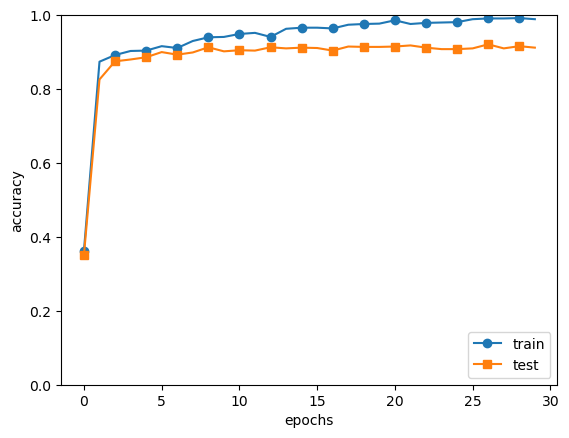

In [34]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 30

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()